In [1]:
import numpy as np

## Functions

In [3]:
# Trigonometric Functions

theta = np.linspace(0,np.pi,3) #From 0 to Pi, three components
print("Theta =", theta)
print("sin(theta) = ", np.sin(theta))

Theta = [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]


In [6]:
# Exponents 

x = [1,2,3,4,10]
print("e^x =", np.exp(x))
print("2^x =", np.exp2(x))
print("3^x =", np.power(3,x))

e^x = [2.71828183e+00 7.38905610e+00 2.00855369e+01 5.45981500e+01
 2.20264658e+04]
2^x = [   2.    4.    8.   16. 1024.]
3^x = [    3     9    27    81 59049]


In [8]:
# Logarithms

print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

ln(x)    = [0.         0.69314718 1.09861229 1.38629436 2.30258509]
log2(x)  = [0.         1.         1.5849625  2.         3.32192809]
log10(x) = [0.         0.30103    0.47712125 0.60205999 1.        ]


In [9]:
x = [0,0.001,0.01,0.1] #These functions give better precision for small val
print("exp(x) - 1 =", np.expm1(x)) 
print("log(1+x)   =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1+x)   = [0.         0.0009995  0.00995033 0.09531018]


In [11]:
from scipy import special
#special ufuncs for numpy like gamma functions, 
#error functions (integrar of Gaussian) and more

In [12]:
#Output specification

x = np.arange(5)
y = np.zeros(10)
print(y[::2])
np.power(2,x,out=y[::2]) #much faster than asigning y
print(y)

[0. 0. 0. 0. 0.]
[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


In [17]:
#Aggregates

import pandas as pd
data = pd.read_csv('C:/Users/usuario1/president_heights.csv') 
heights = np.array(data['height(cm)'])
heights

array([189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175,
       178, 183, 193, 178, 173, 174, 183, 183, 168, 170, 178, 182, 180,
       183, 178, 182, 188, 175, 179, 183, 193, 182, 183, 177, 185, 188,
       188, 182, 185], dtype=int64)

In [22]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum:           ", heights.min())
print("Maximum:           ", heights.max())
print("25th percentile:   ", np.percentile(heights,25))
print("75th percentile:   ", np.percentile(heights,75))
print("Median:            ", np.median(heights))

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum:            163
Maximum:            193
25th percentile:    174.25
75th percentile:    183.0
Median:             182.0


In [21]:
data['height(cm)'].describe()

count     42.000000
mean     179.738095
std        7.015869
min      163.000000
25%      174.250000
50%      182.000000
75%      183.000000
max      193.000000
Name: height(cm), dtype: float64

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() #set plot style

Text(0,0.5,'number')

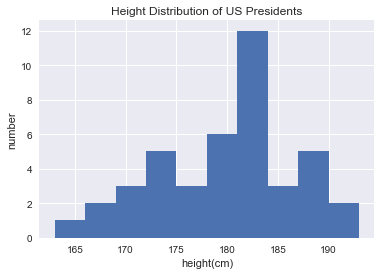

In [25]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height(cm)')
plt.ylabel('number')

## Broadcasting

In [26]:
#Broadcasting - Extends arrays to form new ones

a = np.arange(3)
b = np.arange(3)[:,np.newaxis]
print(a)
print(b)
a + b

[0 1 2]
[[0]
 [1]
 [2]]


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [28]:
M = np.ones((2,3))
a = np.arange(3) 
print(M)
print(a)
M+a #The short array is padded with ones, it stretches dimension to match

[[1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]


array([[1., 2., 3.],
       [1., 2., 3.]])

In [29]:
a = np.arange(3).reshape((3,1))
b = np.arange(3)
print(a)
print(b)
a+b

[[0]
 [1]
 [2]]
[0 1 2]


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [31]:
M = np.ones((3,2))
a = np.arange(3)
print(M)
print(a)
# Rule 1: Pad the shape of "a" with ones
# Rule 2: Stretch the first dimension of "a" to match "M"
# Rule 3: If final shapes don't match -> error
M+a

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [32]:
M + a[:,np.newaxis] #Reshape the array to solve the issue

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [33]:
np.logaddexp(M, a[:,np.newaxis]) #log( exp(a) + exp(b))

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

In [35]:
#Broadcasting is useful for z=f(x,y)
x = np.linspace(0,5,50)
y = x[:, np.newaxis]
z = np.sin(x)**10 + np.cos(10+ y*x) * np.cos(x)

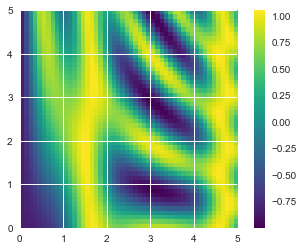

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z, origin='lower',extent=[0,5,0,5],cmap='viridis')
plt.colorbar()

## Comparisons, Masks, and Boolean Logic

In [37]:
import numpy as np
import pandas as pd
data = pd.read_csv('C:/Users/usuario1/Seattle2014.csv')
rainfall = data['PRCP'].values
inches = rainfall / 254 
inches.shape

(365,)

In [38]:
rainy = (inches > 0) #Mask for rainy days
#construct a mask of all summer days (June 21st is the 172nd day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0) 

In [40]:
print("Median precip on rainy days in 2014 (inches)   :" , np.median(inches[rainy]))
print("Median precip on non-summer rainy days (inches):", np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches)   : 0.19488188976377951
Median precip on non-summer rainy days (inches): 0.20078740157480315


## Fancy Indexing

Using an array as index to extract data

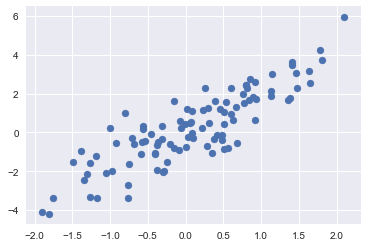

In [44]:
#Selecting random points
mean = [0,0]
cov =[[1,2],[2,5]]
rand = np.random.RandomState(42)
X = rand.multivariate_normal(mean, cov, 100)
plt.scatter(X[:,0], X[:,1])

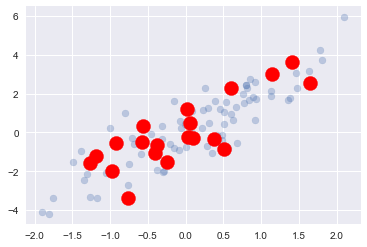

In [54]:
indices = np.random.choice(X.shape[0], 20, replace = False) #20 random points
selection = X[indices] #Fancy indexing
plt.scatter(X[:,0],X[:,1],alpha=0.3)
plt.scatter(selection[:,0], selection[:,1],facecolor='red', s=200)

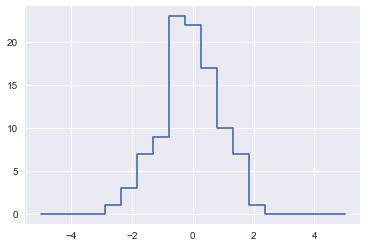

In [41]:
#Histogram by hand
np.random.seed(42)
x = np.random.randn(100)
bins = np.linspace(-5,5,20) #histogram by hand
counts = np.zeros_like(bins)
i = np.searchsorted(bins,x) #find the appropriate bin for each x
np.add.at(counts,i,1)       #add 1 to each bin

plt.plot(bins, counts, linestyle = 'steps')

## Arrays sorting 

In [56]:
x = np.array([2,1,4,3,5])
print(np.sort(x)) #Doesn't change the array
print(x)
x.sort() #Changes the array
print(x)

[1 2 3 4 5]
[2 1 4 3 5]
[1 2 3 4 5]


In [57]:
x = np.array([2,1,4,3,5])
i = np.argsort(x) #indexes of sorted elements
i

array([1, 0, 3, 2, 4], dtype=int64)

In [62]:
rand = np.random.RandomState(42)
X = rand.randint(0,10,(4,6)) #Integers between 0-10 in a 4x6 array
print(X)
print(np.sort(X, axis=0))
np.sort(X, axis=1) #Any connection between row and column values is lost

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]
[[2 1 4 0 1 5]
 [5 2 5 4 3 7]
 [6 3 7 4 6 7]
 [7 6 7 4 9 9]]


array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [63]:
#Partitioning
x = np.array([7,2,3,1,6,5,4])
np.partition(x,3) #Gets the three smallest first. No particular order

array([2, 1, 3, 4, 6, 5, 7])

[[0.23089383 0.24102547]
 [0.68326352 0.60999666]
 [0.83319491 0.17336465]
 [0.39106061 0.18223609]
 [0.75536141 0.42515587]
 [0.20794166 0.56770033]
 [0.03131329 0.84228477]
 [0.44975413 0.39515024]
 [0.92665887 0.727272  ]
 [0.32654077 0.57044397]]


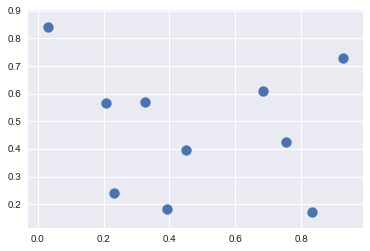

In [65]:
#K-Nearest Neighbors

X = rand.rand(10,2)
print(X)
plt.scatter(X[:,0],X[:,1],s=100)

In [91]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)

Broadcast the arrays to take de difference between the points:

X[:,np.newaxis,:] (10,1,2) -> it extends the 1 dimension
X[np.newaxis,:,:] (1,10,2) -> it extends the 1 dimension

And as a result, it has a (10,10,2). Then it sums over the 2 points with axis = -1 and get a (10,10) result, the difference between all the points

In [92]:
dist_sq.diagonal() #Diagonal must be zero

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [94]:
nearest = np.argsort(dist_sq, axis=1) #Sorting along each row
print(nearest) #The leftmost columns will give the indices of the nearest n

[[0 3 7 5 9 4 1 2 6 8]
 [1 4 8 7 9 2 5 3 0 6]
 [2 4 3 7 1 8 0 9 5 6]
 [3 0 7 9 5 4 2 1 6 8]
 [4 1 2 7 8 3 9 0 5 6]
 [5 9 7 6 0 3 1 4 8 2]
 [6 5 9 7 0 1 3 4 8 2]
 [7 9 3 0 5 4 1 2 8 6]
 [8 1 4 2 7 9 5 3 0 6]
 [9 5 7 0 1 3 6 4 8 2]]


In [95]:
K = 2
#Just a partition will do to check the closest K neighbors.
#Extend K by one since the closest point will always be itself
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)

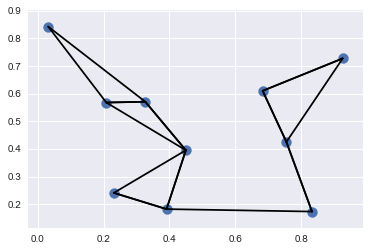

In [96]:
plt.scatter(X[:,0], X[:,1], s=100)
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j],X[i]), color = 'black')